In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
titanic_test = pd.read_csv('test.csv')
titanic_train = pd.read_csv('train.csv')

In [3]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())

In [5]:
titanic_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_train['isFamily'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

In [8]:
titanic_train['isAlone'] = titanic_train['isFamily'].apply(lambda x: 1 if x==1 else 0)

In [9]:
titanic_train.drop(columns=['SibSp', 'Parch', 'Embarked', 'Cabin', 'Name'])

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,isFamily,isAlone
0,1,0,3,male,22.0,A/5 21171,7.2500,2,0
1,2,1,1,female,38.0,PC 17599,71.2833,2,0
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,1,1
3,4,1,1,female,35.0,113803,53.1000,2,0
4,5,0,3,male,35.0,373450,8.0500,1,1
5,6,0,3,male,28.0,330877,8.4583,1,1
6,7,0,1,male,54.0,17463,51.8625,1,1
7,8,0,3,male,2.0,349909,21.0750,5,0
8,9,1,3,female,27.0,347742,11.1333,3,0
9,10,1,2,female,14.0,237736,30.0708,2,0


In [10]:
median_price = titanic_train['Fare'].median()
mean_price = titanic_train['Fare'].mean()
print(median_price) ; print(mean_price)

14.4542
32.2042079685746


Text(0.5, 1.0, 'Ages')

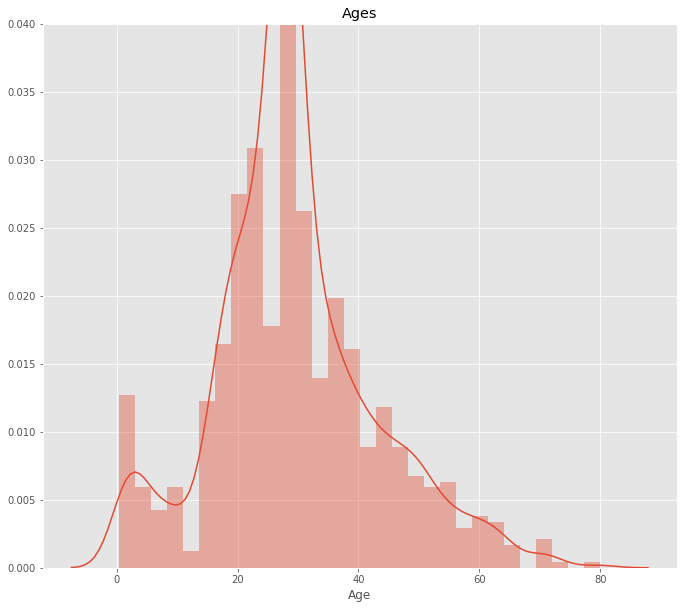

In [11]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,2,1)
ax.set_ylim(0,0.04)
sns.distplot(titanic_train['Age'], bins=30)
ax.set_title('Ages')

In [13]:
titanic_train.loc[titanic_train['Age'] <= 5, 'AgeGroup'] = 1
titanic_train.loc[(titanic_train['Age'] <= 10) & (titanic_train['Age'] > 5), 'AgeGroup'] = 2
titanic_train.loc[(titanic_train['Age'] <= 15) & (titanic_train['Age'] > 10), 'AgeGroup'] = 3
titanic_train.loc[(titanic_train['Age'] <= 20) & (titanic_train['Age'] > 15), 'AgeGroup'] = 4
titanic_train.loc[(titanic_train['Age'] <= 30) & (titanic_train['Age'] > 20), 'AgeGroup'] = 5
titanic_train.loc[(titanic_train['Age'] <= 35) & (titanic_train['Age'] > 25), 'AgeGroup'] = 6
titanic_train.loc[(titanic_train['Age'] <= 40) & (titanic_train['Age'] > 30), 'AgeGroup'] = 7
titanic_train.loc[(titanic_train['Age'] <= 45) & (titanic_train['Age'] > 35), 'AgeGroup'] = 8
titanic_train.loc[(titanic_train['Age'] <= 50) & (titanic_train['Age'] > 40), 'AgeGroup'] = 9
titanic_train.loc[(titanic_train['Age'] <= 55) & (titanic_train['Age'] > 45), 'AgeGroup'] = 10
titanic_train.loc[(titanic_train['Age'] <= 60) & (titanic_train['Age'] > 50), 'AgeGroup'] = 11
titanic_train.loc[(titanic_train['Age'] <= 65) & (titanic_train['Age'] > 55), 'AgeGroup'] = 12
titanic_train.loc[(titanic_train['Age'] <= 70) & (titanic_train['Age'] > 60), 'AgeGroup'] = 13
titanic_train.loc[(titanic_train['Age'] <= 75) & (titanic_train['Age'] > 65), 'AgeGroup'] = 14
titanic_train.loc[(titanic_train['Age'] <= 80) & (titanic_train['Age'] > 70), 'AgeGroup'] = 15
titanic_train.loc[(titanic_train['Age'] <= 85) & (titanic_train['Age'] > 75), 'AgeGroup'] = 16


In [14]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 1, 'female': 0})

In [18]:
y = titanic_train['Survived']
X = titanic_train.drop(['Survived', 'Embarked', 'Age','Name', 'Cabin', 'Ticket', 'Parch', 'SibSp'], axis=1)

X.shape, y.shape
X_array = np.array(X).copy()
y_array = np.array(y).copy()

In [24]:
X.shape, y.shape

((891, 7), (891,))

In [25]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Fare', 'isFamily', 'isAlone',
       'AgeGroup'],
      dtype='object')

In [26]:
pca = PCA(n_components=5)
pca.fit(X_array)
comps = pca.components_
explain = pca.explained_variance_ratio_
for comp, frac in zip(comps, explain):
    print(round(100*frac,4), 'percent:', np.round(comp,3))

96.3914 percent: [-1.     0.    -0.    -0.003  0.    -0.    -0.   ]
3.594 percent: [-0.003 -0.009 -0.002  1.     0.007 -0.003  0.005]
0.0102 percent: [-0.    -0.1    0.023 -0.004 -0.246  0.053  0.962]
0.0033 percent: [ 0.     0.042 -0.045 -0.008  0.944 -0.197  0.257]
0.0006 percent: [ 0.     0.967  0.171  0.009 -0.021  0.171  0.082]


In [27]:
pca = PCA(n_components=2)
pca.fit(X_array)
P = pca.transform(X_array)
scaler = MinMaxScaler()
Q = scaler.fit_transform(P)

In [28]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(Q,y_array, test_size=.3)

In [30]:
X_reduced = PCA(n_components=2).fit_transform(xtrain)
X_test_reduced = PCA(n_components=2).fit_transform(xtest)

In [31]:
X_set, y_set = np.concatenate([X_reduced, X_test_reduced], axis=0), np.concatenate([ytrain, ytest], axis=0)




In [42]:
clf_svm = SVC(kernel='linear',C=1, gamma='auto')
t = np.array(ytrain)
t = t.astype(np.integer)
clf_svm.fit(X_reduced, t)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

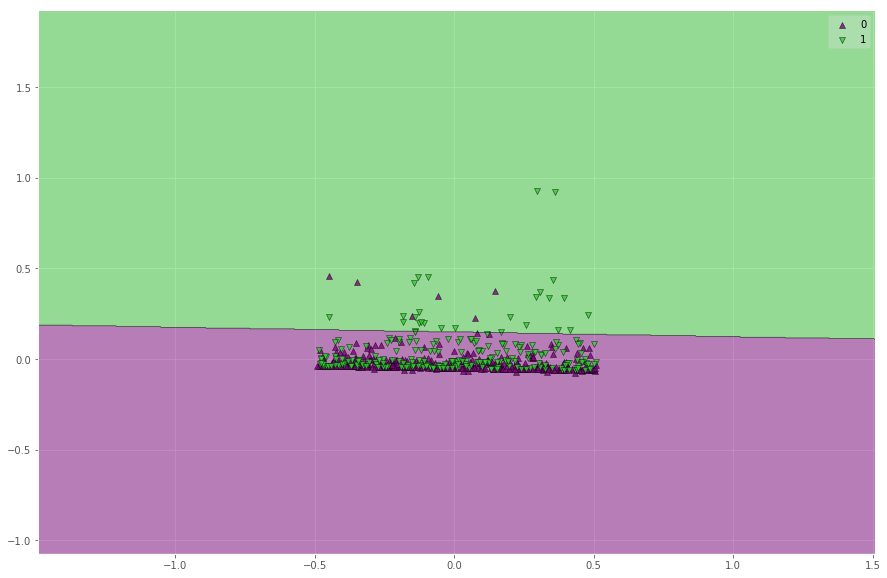

In [43]:
plt.figure(figsize=[15,10])
plot_decision_regions(X_reduced, t, clf=clf_svm, hide_spines=False, colors='purple,limegreen', markers=['^','v'])

In [47]:
titanic_test1 = titanic_train
titanic_test1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'isFamily', 'isAlone',
       'AgeGroup'],
      dtype='object')

In [ ]:
def svm_evaluate(classifier, X, Y, N):
    errs=[]
    for j in range(N):
        xtrain, xtest, ytrain, ytest = train_test_split(X_array, y_array)
        classifier.fit(xtrain, ytrain)
        YP=classifier.predict(xtest)
        errs.append(1-accuracy_score(ytest,YP))
    return(np.mean(errs),np.std(errs))

In [ ]:
print("Linear Kernel     mean error=%7.5f sd=%7.5f" \
      %svm_evaluate(SVC(kernel="linear",gamma=10), Q, y_array,10))
print("Polynomial Kernel mean error=%7.5f sd=%7.5f" \
      %svm_evaluate(SVC(kernel="poly", degree=3, gamma=10, coef0=3), Q, y_array,10))
print("Sigmoid Kernel    mean error=%7.5f sd=%7.5f" \
      %svm_evaluate(SVC(kernel="sigmoid", gamma=1, coef0=0), Q, y_array,10))

Linear Kernel     mean error=0.20628 sd=0.02521


In [ ]:
x_plot = (X - np.min(X)) / (np.max(X) - np.min(X)).values
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x_plot.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)

In [52]:
model_svm = SVC(kernel='linear', C=1, gamma='auto')
model_svm.fit(xtrain, ytrain)
score = cross_val_score(model_svm, X, y_array, scoring='accuracy', cv=10, n_jobs=-1).mean()
predictions = model_svm.predict(xtest)
print(score)
print(predictions.size)

0.8035903983656792
268


In [ ]:
stand_scaler = StandardScaler()
xtrain = stand_scaler.fit_transform(xtrain)
xtest = stand_scaler.fit_transform(xtest)
model_svm.fit(xtrain, ytrain)
y_prediction = model_svm.predict(xtest)
print(accuracy_score(ytest, y_prediction))

In [ ]:
y_prediction.size

In [ ]:
submisson = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived':predictions})